<a href="https://colab.research.google.com/github/Claussss/GSoC_evaluation_tests/blob/main/Common_Test_I_Simulating_Superfluid_Dark_Matter_(DM)_with_PyAutoLens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Common Test I. Simulating Superfluid Dark Matter (DM) with PyAutoLens

Theoretically, there could be condensate models of dark matter. In this case, dark matter is a quasi-particle eccitation of the condensate. 

These condensate models have property to form vortices, which look like lines on our lensing images.

For this task I have to simulate strong lensing from superfluid dark matter by using PyAutoLens.

PyAutoLens doesn't have a 'Linear Mass' profile, so I use a set of PointMass profiles to form a line.

In [36]:
%%capture
!pip install autolens

In [37]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt
from astropy import cosmology as cosmo
import math

#### Parameters

In [38]:
#The pixel-scale describes the conversion from pixel units to arc-seconds.
pixel_scales=0.05

#### Grid

In [39]:
# Describes the deflection of light
grid = al.Grid2D.uniform(shape_native=(150,150), pixel_scales=pixel_scales)

#### Source galaxy

Paramets were chosen and edited manually basing on the [PyAutoLense documentation](https://pyautolens.readthedocs.io/en/latest/).



In [40]:
source_light_profile = al.lp.EllipticalSersic(
        centre=(0.5, 0.0), #  arc-second coordinates of the light profile centre
        intensity=0.88, # intensity normalisation of the light profiles (electrons per second)
        effective_radius=0.5, # circular radius containing half the light of the ligh profile
        sersic_index=1.5 # lower value -> less concentrated, higher value -> more concentrated
        )

source_galaxy = al.Galaxy(redshift=1.0, light=source_light_profile)

#### Lens galaxy

##### Mass Profiles

In [41]:
# This number is set manually. We need enough points to set up a continuous line.
n_points_mass= 20
# Galaxy class constructor takes a list of masses in **kwards form, so I need to generate a dict of masses.
# I use a modified transformation formula from polar to cartesian coordinates to find the start point for vortex.
thetha = math.radians(2)
x = -0.5*math.cos(thetha)
y = -0.5*math.sin(thetha)

lense_mass_profiles_dict = {
    f'Point{i+1}':al.mp.PointMass(centre=(x + i*math.cos(thetha)/n_points_mass, 
                                          y + i*math.sin(thetha)/n_points_mass), 
                                          einstein_radius = 0.96/n_points_mass)
                                          for i in range(n_points_mass)}
# Addind dark matter halo mass profile
lense_mass_profiles_dict['Dark Matter Halo'] = al.mp.SphericalIsothermal(centre=(0,0), einstein_radius=1.2)

##### Light Profile

In [42]:
lense_light_profile = al.lp.EllipticalSersic(
        centre=(0,0), #  arc-second coordinates of the light profile centre
        intensity=1.2, # intensity normalisation of the light profiles (electrons per second)
        effective_radius=0.5, # circular radius containing half the light of the ligh profile
        sersic_index=2.5 # lower value -> less concentrated, higher value -> more concentrated
    )

##### Creating Lense Galaxy

In [43]:
lens_galaxy = al.Galaxy(
    redshift=0.5, light=lense_light_profile, **lense_mass_profiles_dict)

#### Trace Galaxies

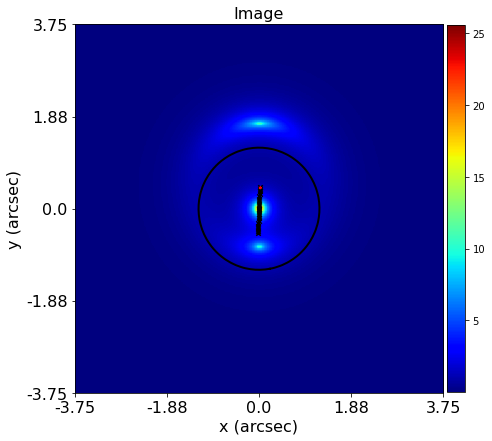

In [44]:
tracer = al.Tracer.from_galaxies([source_galaxy,lens_galaxy],cosmology=cosmo.Planck15)
image = tracer.image_from_grid(grid=grid)

tracer_plotter = aplt.TracerPlotter(tracer=tracer, grid=grid)
tracer_plotter.figures(image=True)